In [3]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import warnings
from IPython.display import clear_output
from multiprocessing import Pool
from time import time

warnings.filterwarnings('ignore')

from model import ADAIN
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [23]:
def execute_fold(f_i):
    ### Load fold wise data
    print('Loading the data')
    fold = str(f_i)
    station_metaq = np.load('../data/adain/fold_'+fold+'_station_metaq_data_train.npz')['arr_0']
    station_dist = np.load('../data/adain/fold_'+fold+'_station_dist_data_train.npz')['arr_0']
#     display(len(station_metaq))
    local_met = np.load('../data/adain/fold_'+fold+'_local_met_data_train.npz')['arr_0']
    local_aq = np.load('../data/adain/fold_'+fold+'_local_aq_data_train.npz')['arr_0']

    # station_metaq.shape, station_dist.shape, local_met.shape, local_aq.shape

    ### Training
    print('Training started')
    init = time()
    tf.random.set_seed(0)
    met = 29
    dist = 2
    aq = 1
    time_window = 24
    dropout = 0.1

    model = ADAIN(met, dist, aq, time_window, dropout)
    model.compile(loss='mse', 
                  optimizer='adam', 
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])

    history = model.fit(x=[local_met, station_dist, station_metaq], 
              y=local_aq, batch_size=64, validation_split=0.1, epochs=15,
              verbose=1)
    model.save('../results/adain/trained_'+fold+'.h5', save_format="h5")
    clear_output(wait=True)
    print('Finished in', (time()-init)/60, 'minutes')
    return history

### Fold 0

In [24]:
history = execute_fold(0)

Finished in 1.8378111203511556 minutes


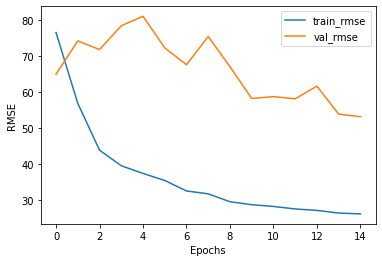

In [26]:
plt.plot(history.history['root_mean_squared_error'], label='train_rmse')
plt.plot(history.history['val_root_mean_squared_error'], label='val_rmse')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend();

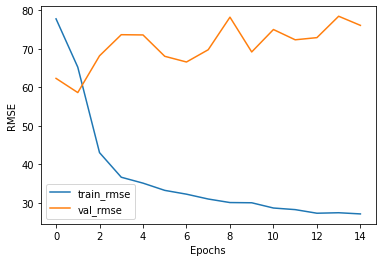

In [18]:
plt.plot(history.history['root_mean_squared_error'], label='train_rmse')
plt.plot(history.history['val_root_mean_squared_error'], label='val_rmse')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend();

### Fold 1

In [27]:
history = execute_fold(1)

Finished in 1.817098601659139 minutes


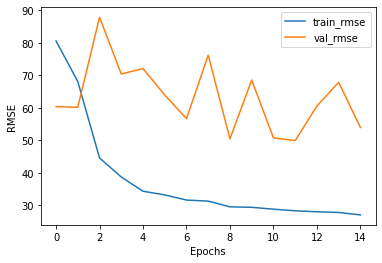

In [28]:
plt.plot(history.history['root_mean_squared_error'], label='train_rmse')
plt.plot(history.history['val_root_mean_squared_error'], label='val_rmse')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend();

### Fold 2

In [29]:
history = execute_fold(2)

Finished in 1.8530916531880697 minutes


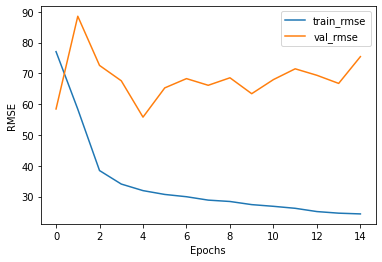

In [30]:
plt.plot(history.history['root_mean_squared_error'], label='train_rmse')
plt.plot(history.history['val_root_mean_squared_error'], label='val_rmse')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend();